In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.10.0'

In [9]:
#preprocessing Traing set
train_data = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
training_set_male=train_data.flow_from_directory(
    'workingData\Pictures\_train\person_Male',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')
training_set_female=train_data.flow_from_directory(
    'workingData\Pictures\_train\person_Female',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 0 images belonging to 0 classes.


In [26]:
#Function to Load Images & Labels
import os
from tqdm import tqdm  #Display Progress
import cv2 #openCV

class_names = ['person_Male', 'person_Female']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)

def load_data():
    
    datasets = ['workingData\Pictures\_train\person_gender','workingData\Pictures\_test\person_gender']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [28]:
#Loading Data (Training & Test Dataset)
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading workingData\Pictures\_train\person_gender


100%|███████████████████████████████████████████████████████████████████████████████| 624/624 [00:00<00:00, 919.55it/s]


Loading workingData\Pictures\_test\person_gender


100%|███████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 916.38it/s]


In [30]:
from sklearn.utils import shuffle 
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

## Data visualization

In [31]:
#Label Dataset Shape
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 838
Number of testing examples: 148
Each image is of size: (150, 150)


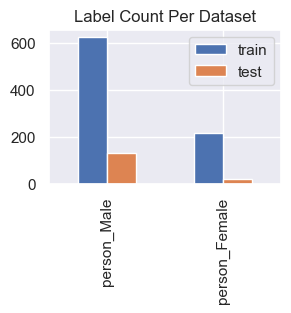

In [34]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar(figsize=(3,2))
plt.title('Label Count Per Dataset')
plt.show()

In [35]:
#Scale the data
train_images = train_images / 255.0
test_images = test_images / 255.0

## Model

In [36]:
#Build Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [38]:
#Compile Model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
#Training the Model
history = model.fit(train_images, train_labels, batch_size=100, epochs=10, validation_split = 0.2)

Epoch 1/10
7/7 [==============================] - 4s 513ms/step - loss: 1.1797 - accuracy: 0.5701 - val_loss: 0.6375 - val_accuracy: 0.7262
Epoch 2/10
7/7 [==============================] - 6s 936ms/step - loss: 0.5820 - accuracy: 0.7493 - val_loss: 0.5168 - val_accuracy: 0.7321
Epoch 3/10
7/7 [==============================] - 7s 970ms/step - loss: 0.4445 - accuracy: 0.7910 - val_loss: 0.4125 - val_accuracy: 0.7798
Epoch 4/10
7/7 [==============================] - 6s 815ms/step - loss: 0.3551 - accuracy: 0.8343 - val_loss: 0.4824 - val_accuracy: 0.7738
Epoch 5/10
7/7 [==============================] - 7s 941ms/step - loss: 0.3218 - accuracy: 0.8627 - val_loss: 0.4654 - val_accuracy: 0.7976
Epoch 6/10
7/7 [==============================] - 6s 786ms/step - loss: 0.2819 - accuracy: 0.8970 - val_loss: 0.4419 - val_accuracy: 0.8214
Epoch 7/10
7/7 [==============================] - 6s 895ms/step - loss: 0.2172 - accuracy: 0.9060 - val_loss: 0.3393 - val_accuracy: 0.8274
Epoch 8/10
7/7 [====

## Model Testing

In [40]:
test_loss = model.evaluate(test_images, test_labels)

5/5 [==============================] - 0s 39ms/step - loss: 0.2592 - accuracy: 0.8919


In [42]:
#garbage collection to save memory
import gc
gc.collect()

9391

In [47]:
def display_random_img(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()
    

#display_random_img (class_names, train_images, train_labels)

In [51]:
test_images

array([[[[0.1254902 , 0.11764706, 0.06666667],
         [0.10588235, 0.09803922, 0.04705882],
         [0.09411765, 0.08627451, 0.03921569],
         ...,
         [0.21176471, 0.18431373, 0.12156863],
         [0.20784314, 0.1882353 , 0.1254902 ],
         [0.19607843, 0.17254902, 0.10980392]],

        [[0.10588235, 0.09803922, 0.04705882],
         [0.10588235, 0.09803922, 0.04705882],
         [0.09803922, 0.09019608, 0.03921569],
         ...,
         [0.21568628, 0.19215687, 0.12156863],
         [0.20784314, 0.1882353 , 0.11372549],
         [0.1882353 , 0.16862746, 0.09411765]],

        [[0.09411765, 0.08627451, 0.03921569],
         [0.10588235, 0.09803922, 0.05098039],
         [0.10588235, 0.09803922, 0.05098039],
         ...,
         [0.18431373, 0.16470589, 0.08235294],
         [0.1764706 , 0.15686275, 0.07450981],
         [0.16862746, 0.14901961, 0.06666667]],

        ...,

        [[0.09019608, 0.12156863, 0.07843138],
         [0.08627451, 0.11372549, 0.06666667]

5/5 [==============================] - 0s 34ms/step


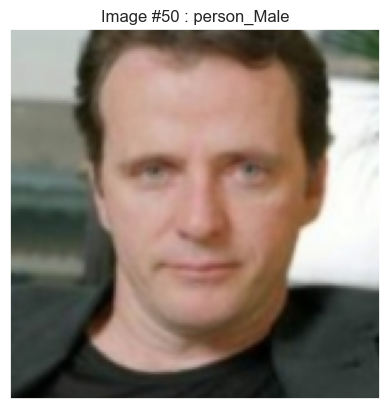

In [53]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_img(class_names, test_images, pred_labels)

In [55]:
np.argmax(predictions, axis = 1)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
test_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])